# 2 Relativistic Gravity Tunnel

## Electrostatic GT

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


k = 8.988e9 #In Nm2/C2
m = [1,100,200,400,800] #in kg
q = np.array([1,2,3,5]) #in C
Q = 10e8 #in C
R = 10e3#6.371e6 #in m

qk = np.sqrt(k)*q
Qk = np.sqrt(k)*Q
Rho_Q = 3*Q/(4*np.pi*R**3) #9.28 #in C/m3
Rho_Qk = np.sqrt(k)*Rho_Q

    
#Physical functions
def V(Q, q, m, R):
    return np.sqrt(2*Q*q/(m*R))


def T(rho, q, m):
    return np.sqrt(3*np.pi*m/(rho*q))



#Plotting functions
def Plot_mass():
    
    x = np.arange(1,10,0.1)
    Rho = Rho_Qk*x

    Time1 = T(Rho, qk[0], m[1]) #in s
    Time2 = T(Rho, qk[0], m[2]) #in s
    Time3 = T(Rho, qk[0], m[3]) #in s
    Time4 = T(Rho, qk[0], m[4]) #in s

    plt.xlabel(' 'r'$\rho[C/m^3]$')
    plt.ylabel('$T [s]$')
    plt.plot(x, Time1, 'b', label='m=100kg')
    plt.plot(x, Time2, 'r', label='m=200kg')
    plt.plot(x, Time3, 'y', label='m=400kg')
    plt.plot(x, Time4, 'g', label='m=800kg')
    plt.legend(fontsize='x-large')
    plt.savefig('Plots/1-Electrostatic_times_masses_py.pdf')



def Plot_charge():
    
    x = np.arange(1,10,0.1)
    Rho = Rho_Qk*x

    Time1 = T(Rho, qk[0], m[1]) #in s
    Time2 = T(Rho, qk[1], m[1]) #in s
    Time3 = T(Rho, qk[2], m[1]) #in s
    Time4 = T(Rho, qk[3], m[1]) #in s

    plt.xlabel('$\\rho \ [\\rho_c]$')
    plt.ylabel('$T \ [s]$')
    plt.plot(x, Time1, 'b', label='q=1 C')
    plt.plot(x, Time2, 'r', label='q=2 C')
    plt.plot(x, Time3, 'y', label='q=3 C')
    plt.plot(x, Time4, 'g', label='q=5 C')
    plt.legend(fontsize='x-large')
    plt.savefig('Plots/1-Electrostatic_times_charges_py.pdf')

    


def main():
    print('Density = ', Rho_Qk, 'C/m^3')
    
    Velocity = V(Qk, qk[0], m[0], R)
    print("v = ", Velocity, "m/s")
    print("  = ", Velocity/3e8, 'c')

    #Plot_mass()
    Plot_charge()

main()

## Special Relativistic GT

### Energy Considerations

 Duffing equation is a force equation. Let's fin then the energetic expression of this system. To that end, multiplying it by $d\hat{x}/d\hat{\tau}$, and integrate 
    
\begin{equation*}
        \int \frac{d^2 \hat{x}}{d\tau^2} \frac{d \hat{x}}{d\tau} d\tau = - \hat{E} \int  \hat{x}\frac{d\hat{x}}{d\tau} d\tau  + \frac{1}{2} \int \hat{x}^3  \frac{d \hat{x}}{d\tau} d\tau  ,
\end{equation*}

so we get

\begin{equation}
    \frac{1}{2}   \left( \frac{d\hat{x}}{d\tau}\right )^2 + V_{\text{eff}}^{SR} (\hat{x} ) = \text{Const} ,
\end{equation}

where the relativistic effective potential is

\begin{equation}
        V_{\text{eff}}^{SR} = \frac{1}{2} \hat{E}  \hat{x}^2 - \frac{1}{8} \hat{x}^4 = \frac{1}{2} \left( 1 + \frac{1}{2} \hat{R}^2 \right) \hat{x}^2 - \frac{1}{8} \hat{x}^4 ,
\end{equation}

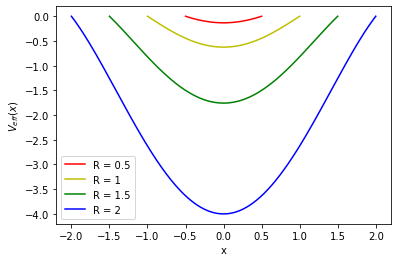

In [92]:
import numpy as np
import scipy.special as spy
import matplotlib.pyplot as plt
from scipy.integrate import odeint as ode

R1, R2, R3, R4 = 0.5, 1.0, 1.5, 2.0 

#Effective potential
def V(x, R):
    E = 1 + 0.5*R*R
    return 0.5*E*x**2 - 0.125*x**4 

def Plot_potentials():
    x1 = np.arange(-0.5,0.51,0.01)
    x2 = np.arange(-1  ,1.01,0.01)
    x3 = np.arange(-1.5,1.51,0.01)
    x4 = np.arange(-2  ,2.01,0.01)
    y1 = V(x1, R1) - V(R1, R1)
    y2 = V(x2, R2) - V(R2, R2)
    y3 = V(x3, R3) - V(R3, R3)
    y4 = V(x4, R4) - V(R4, R4)
    
    
    plt.xlabel('x')
    plt.ylabel('$V_{eff}(x)$')
    plt.plot(x1, y1, 'r', label='R = 0.5')
    plt.plot(x2, y2, 'y', label='R = 1')
    plt.plot(x3, y3, 'g', label='R = 1.5')
    plt.plot(x4, y4, 'b', label='R = 2')
    plt.legend()
    #plt.savefig("Plots/2-Effecive_Potential_SR_py.pdf")
    
Plot_potentials()

### Proper Velocity

To find the proper velocity, notice that, at the turning points, 
    
\begin{equation*}
    0 + \frac{1}{2} \hat{R}^2 + \frac{1}{8} \hat{R}^4 = \frac{1}{8} \hat{R}^2 \hat{R}_+^2 = \text{Const} ,
\end{equation*}

Here we have it

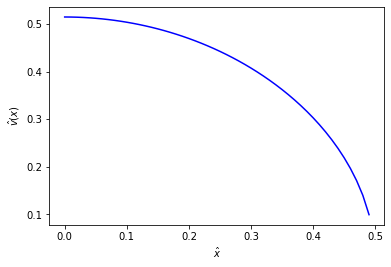

In [93]:
def v(x, R):
    Rp = np.sqrt(4 + R*R)
    return 0.5*np.sqrt(R**2*Rp**2 - (R**2 + Rp**2)*x**2 + x**4 )

def Plot_velocity():
    x1 = np.arange(0,R1,0.01)
    v1 = v(x1, R1)
    
    plt.xlabel('$\hat{x}$')
    plt.ylabel('$\hat{v} (x)$')    
    plt.plot(x1, v1, 'b')
    #plt.savefig("Plots/3-Proper_velocity_py.pdf")

Plot_velocity()

### Proper Trajectory

The functional form is

\begin{equation*}
    \hat{x} = \hat{R} \text{sn} \left (\frac{\hat{R}_+}{2} \hat{\tau} , \frac{\hat{R}}{\hat{R}_+} \right),
\end{equation*}

where $ sn (x,y)$ is Jacobi elliptic function. This solutions, for the first oscillation periods,

<ipython-input-94-628fa3263d1d>:35: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes()


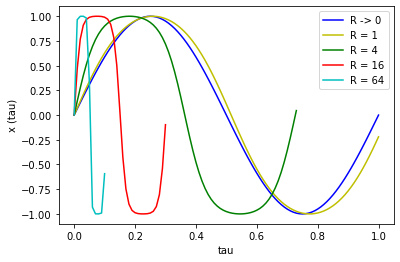

In [94]:

def tau(x, R):
    Rp = np.sqrt(4 + R*R)
    F = spy.ellipkinc(x/R, R/Rp)
    return 2/Rp*F

def Plot_tau():
    x1 = np.arange(0,R1,0.01)
    tau1 = tau(x1, R1)
    
    plt.xlabel('$\hat{x}$')
    plt.ylabel('$\hat{\tau} (x)$')    
    plt.plot(x1, tau1, 'r')

    
def x(t, R):
    Rp = np.sqrt(4 + R*R)
    sn = spy.ellipj(np.pi*Rp*t , R/Rp )
    return sn[0]

def Plot_Prop_Trajectory():
    tau1 = np.arange(0,1.01,0.01)
    tau2 = np.arange(0,1.01,0.01)
    tau3 = np.arange(0,.74,0.01)
    tau4 = np.arange(0,.306,0.01)
    tau5 = np.arange(0,.11,0.01)
    Trajec1 = x(tau1, 0.0)
    Trajec2 = x(tau2, 1)
    Trajec3 = x(tau3, 4)
    Trajec4 = x(tau4, 16)
    Trajec5 = x(tau5, 64)
    
    
    plt.xlabel('tau')
    plt.ylabel('x (tau)')    
    plt.axes()
    plt.plot(tau1, Trajec1, 'b', label='R -> 0')
    plt.plot(tau2, Trajec2, 'y', label='R = 1')
    plt.plot(tau3, Trajec3, 'g', label='R = 4')
    plt.plot(tau4, Trajec4, 'r', label='R = 16')
    plt.plot(tau5, Trajec5, 'c', label='R = 64')
    plt.legend()    
    #plt.savefig("Plots/1-SRel_Traj__Prop.pdf")

Plot_Prop_Trajectory()

## Coordinate Trajectory

For the coordinate time $t$, we have

\begin{equation*}
    \frac{d \hat{t}}{d\hat{x}} = \frac{\gamma }{\hat{v}},
\end{equation*}

and, as $\gamma = \sqrt{1 + \hat{\omega}^2}$, we have

\begin{equation*}
    \frac{d \hat{x}}{d\hat{t}} = \sqrt{ 1 + \frac{1}{\hat{v}^2}} = \sqrt{ 1 - \frac{1}{(\hat{E} - \frac{1}{2} \hat{x}^2)^2}} ,
\end{equation*}

In [162]:
def Coordinate_times(x, R, tau):
    Rp = np.sqrt(4 + R*R)
    E = spy.ellipeinc(x/R, R/Rp)
    F = spy.ellipkinc(x/R, R/Rp)
    return Rp*E - 2/Rp*F - tau


def Coordinate_Trajectory(x, t, R):
    E = 1 + 0.5*R*R
    dxdt = np.sqrt(1 - 1/(E - 0.5*x**2)**2)
    return dxdt


def Solve_trajectory(trajectory, t_array, x0, R, N):
    solution = ode(trajectory, x0, t_array, args=(R,))

    r = np.zeros(N)
    for i in np.arange(N):
        r[i] = solution[i]

    return r


def Plot_Coord_trajectory(t,x, color, name):
    
    plt.xlabel('$\hat{t}$')
    plt.ylabel('$\hat{x} (t)$')
    
    plt.plot(t, x, color, label=name)
    plt.legend()
    plt.savefig("Plots/6-Coordinate_Trajectory_py.pdf")    

### Main parameters

In [160]:
# Initial conditions and step
ti, dt = 0, 0.01
xi =  0.0

#Arrays for the 4 cases
R = np.array([0.25,1,2,4])
tf = np.array([1.57,1.85,2.5,4.25])
N = tf/dt

t0 = np.arange(ti, tf[0]+dt, dt)
t1 = np.arange(ti, tf[1]+dt, dt)
t2 = np.arange(ti, tf[2]+dt, dt)
t3 = np.arange(ti, tf[3]+dt, dt)

**Plotting trajectories**

<ipython-input-162-7ed03e13fcbe>:10: RuntimeWarning: invalid value encountered in sqrt
  dxdt = np.sqrt(1 - 1/(E - 0.5*x**2)**2)


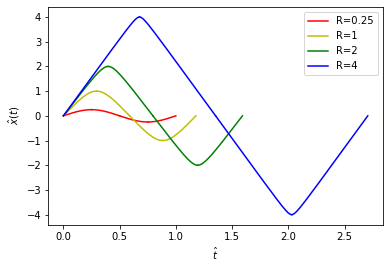

In [163]:
#########################   R = 0.25  #################################
Radius = R[0] 
Trajectory = Coordinate_Trajectory

t = t0
n = int(N[0])
tf = t[n]


x = Solve_trajectory(Trajectory, t, xi, Radius, n+1)

#for i in range(n):
    #print(t[i], ' ', x[i])

#Intervals
tau1 = t/(2*np.pi)
tau2 = (-t+2*tf)/(2*np.pi)
tau3 = (t+2*tf)/(2*np.pi)
tau4 = (-t+4*tf)/(2*np.pi)

#Plots
Plot_Coord_trajectory(tau1, x,'r','R=0.25')
Plot_Coord_trajectory(tau2, x,'r','')
Plot_Coord_trajectory(tau3, -x,'r','')
Plot_Coord_trajectory(tau4, -x,'r','')

#########################   R = 1  #################################
Radius = R[1] 
Trajectory = Coordinate_Trajectory

t = t1
n = int(N[1])
tf = t[n]


x = Solve_trajectory(Trajectory, t, xi, Radius, n+1)


#Intervals
tau1 = t/(2*np.pi)
tau2 = (-t+2*tf)/(2*np.pi)
tau3 = (t+2*tf)/(2*np.pi)
tau4 = (-t+4*tf)/(2*np.pi)

#Plots
Plot_Coord_trajectory(tau1,  x,'y','R=1')
Plot_Coord_trajectory(tau2,  x,'y','')
Plot_Coord_trajectory(tau3, -x,'y','')
Plot_Coord_trajectory(tau4, -x,'y','')

#########################   R = 2  #################################

Radius = R[2] 
Trajectory = Coordinate_Trajectory

t = t2
n = int(N[2])
tf = t[n]


x = Solve_trajectory(Trajectory, t, xi, Radius, n+1)


#Intervals
tau1 = t/(2*np.pi)
tau2 = (-t+2*tf)/(2*np.pi)
tau3 = (t+2*tf)/(2*np.pi)
tau4 = (-t+4*tf)/(2*np.pi)

#Plots
Plot_Coord_trajectory(tau1,  x,'g','R=2')
Plot_Coord_trajectory(tau2,  x,'g','')
Plot_Coord_trajectory(tau3, -x,'g','')
Plot_Coord_trajectory(tau4, -x,'g','')

#########################   R = 4  #################################
Radius = R[3] 
Trajectory = Coordinate_Trajectory

t = t3
n = int(N[3])
tf = t[n]


x = Solve_trajectory(Trajectory, t, xi, Radius, n+1)


#Intervals
tau1 = t/(2*np.pi)
tau2 = (-t+2*tf)/(2*np.pi)
tau3 = (t+2*tf)/(2*np.pi)
tau4 = (-t+4*tf)/(2*np.pi)

#Plots
Plot_Coord_trajectory(tau1,  x,'b','R=4')
Plot_Coord_trajectory(tau2,  x,'b','')
Plot_Coord_trajectory(tau3, -x,'b','')
Plot_Coord_trajectory(tau4, -x,'b','')

## General Relaticistic GT

to start the generalization, consider Schwarzschild's interior metric

\begin{equation}
    ds^2 = - \left( \frac{3}{2} \sqrt{ 1 - 2 \hat{R}^2 } - \frac{1}{2} \sqrt{1 - 2 r^2} \right)^2 c^2 dt^2 + \frac{dr^2}{1 - 2 r}
\end{equation}

where we have dropped the angular dependence because of the clear symmetry of the problem, and in this case the non dimensional radius is


\begin{equation*}
    \hat{R} = \omega R = \sqrt{\frac{GM}{R}}.
\end{equation*}


### Null trajectory

Let's consider first the simplest of all cases for this situation, i.e., that of a massless particle. For this, $ds^2 = 0$, so can find the trajectory as

\begin{equation*}
    \frac{dr}{dt} = \frac{3}{2} \sqrt{(1-2r^2)(1-2R^2)} + r^2 - \frac{1}{2} \\
    \int \frac{dr}{\frac{3}{2} \sqrt{(1-2r^2)(1-2R^2)} + r^2 - \frac{1}{2}} = \int dt \\
    \frac{1}{\sqrt{4 - 9R^2}}\arctan{\left [ \frac{r \sqrt{4-9R^2}\left(1 + 3\sqrt{(1-2r^2)(1-2R^2)} \right)}{4 - 9R^2 - 9r^2 (1- 2R^2)} \right] }= t,
\end{equation*}

Which we can solve with Python

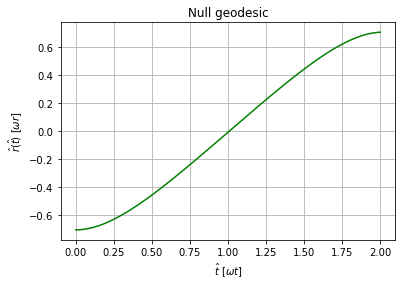

In [164]:
def Null_Trajectory(x, t, R):
    dxdt = 1.5*np.sqrt((1 - 2*x**2)*(1 - 2*R**2)) + x**2 - 0.5
    return dxdt

def Solve_trajectory(trajectory, t_array, x0, R, N):
    solution = ode(trajectory, x0, t_array, args=(R,))

    r = np.zeros(N)
    for i in np.arange(N):
        r[i] = solution[i]

    return r

def Plot_Null_trajectory(t, x):
    plt.title('Null geodesic')
    plt.xlabel('$\hat{t} \ [\omega t] $')
    plt.ylabel('$\hat{r}(\hat{t}) \ [\omega r] $')
    plt.plot(t, x, 'g')
    plt.grid()
    plt.savefig("Plots/7-Null_Trajectory_py.pdf")

#Integration interval, step and number of steps
t0, tf, dt = 0, 2, 0.01
t = np.arange(t0, tf+dt, dt) 
N = int((tf-t0)/dt)

#Initial conditions
R = [0.2,0.4,0.6,2/3]
x0 =  -1/np.sqrt(2)
    
x = np.zeros([N,3])
Trajectory = Null_Trajectory

x = Solve_trajectory(Trajectory, t, x0, R[0], N+1)

Plot_Null_trajectory(t,x)


## Massive Trajectories

### Effective Potential

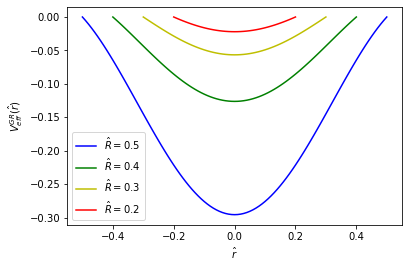

In [165]:

def V(r,R):
    E = np.sqrt(1-2*R**2)
    x = np.sqrt(1-2*r**2)/E
    return -0.5*pow(E*x,2)*( (5-x)*(x-1)/(x-3)**2)

    
R1, R2, R3, R4 = 0.5, 0.4, 0.3, 0.2
x1 = np.arange(-0.5,0.51,0.01)
x2 = np.arange(-0.4,0.41,0.01)
x3 = np.arange(-0.3,0.31,0.01)
x4 = np.arange(-0.2,0.21,0.01)
y1 = V(x1, R1) - V(R1, R1)
y2 = V(x2, R2) - V(R2, R2)
y3 = V(x3, R3) - V(R3, R3)
y4 = V(x4, R4) - V(R4, R4)

plt.xlabel('$\hat{r}$')
plt.ylabel('$V_{eff}^{GR}(\hat{r})$')
plt.plot(x1, y1, 'b', label='$\hat{R} = 0.5$')
plt.plot(x2, y2, 'g', label='$\hat{R} = 0.4$')
plt.plot(x3, y3, 'y', label='$\hat{R} = 0.3$')
plt.plot(x4, y4, 'r', label='$\hat{R} = 0.2$')
plt.legend()
plt.savefig("Plots/8-Effecive_Potential_GR_py.pdf")

### Trajectory

In this case the equation to solve is


\begin{equation*}
    \frac{dr}{d\tau} = \hat{E} x \frac{\sqrt{(5-x)(x-1)}}{x-3},
\end{equation*}

with 

\begin{equation*}
    x = \frac{\sqrt{1-2r^2}}{E^2}  = \frac{\sqrt{1 - 2 r^2}}{1 - 2 R^2}.
\end{equation*}

here we implement it

### Main functions

In [168]:
def Massive_Trajectory(r , t, R):
    E = np.sqrt(1-2*R**2)
    x = np.sqrt(1-2*r**2)/E
    drdt = E*x*np.sqrt((5-x)*(x-1))/(3-x)
    return drdt

def Solve_trajectory(trajectory, t_array, x0, R, N):
    solution = ode(trajectory, x0, t_array, args=(R,))

    r = np.zeros(N)
    for i in np.arange(N):
        r[i] = solution[i]

    return r
    
def Plot_Massive_trajectory(t, x, color, name):
    plt.xlabel('$\hat{t} \ [\omega t ] $')
    plt.ylabel('$\hat{r} \ [\omega r ] $')
    plt.plot(t, x, color, label=name)
    plt.legend()
    plt.savefig("Plots/9-Massive_Trajectory_py.pdf")

### Main parameters

In [169]:
# Initial conditions and step
ti, dt = 0, 0.005
xi =  0.0

#Arrays for the 4 cases
R = np.array([0.2,0.4,0.6,2/3])
tf = np.array([1.5,1.35,1.0,0.5])
N = tf/dt#int((tf-ti)/dt)

t0 = np.arange(ti, tf[0]+dt, dt)
t1 = np.arange(ti, tf[1]+dt, dt)
t2 = np.arange(ti, tf[2]+dt, dt)
t3 = np.arange(ti, tf[3]+dt, dt)

**Plotting Trajectories**

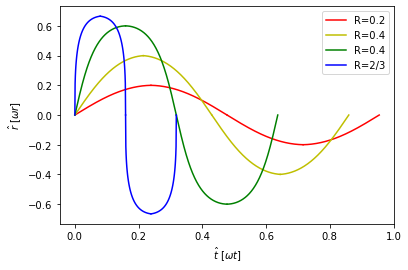

In [170]:
#########################   R = 0.2  #################################
Radius = R[0] 
Trajectory = Massive_Trajectory

t = t0
n = int(N[0])
tf = t[n]

x = Solve_trajectory(Trajectory, t, xi, Radius, n+1)

#Intervals
tau1 = t/(2*np.pi)
tau2 = (-t+2*tf)/(2*np.pi)
tau3 = (t+2*tf)/(2*np.pi)
tau4 = (-t+4*tf)/(2*np.pi)

# Plots
Plot_Massive_trajectory(tau1, x,'r','R=0.2')
Plot_Massive_trajectory(tau2, x,'r','')
Plot_Massive_trajectory(tau3, -x,'r','')
Plot_Massive_trajectory(tau4, -x,'r','')

#########################   R = 0.4  #################################
Radius = R[1] 
t = t1
n = int(N[1])
tf = t[n]

x = Solve_trajectory(Trajectory, t, xi, Radius, n+1)

#Intervals
tau1 = t/(2*np.pi)
tau2 = (-t+2*tf)/(2*np.pi)
tau3 = (t+2*tf)/(2*np.pi)
tau4 = (-t+4*tf)/(2*np.pi)

# Plots
Plot_Massive_trajectory(tau1, x,'y','R=0.4')
Plot_Massive_trajectory(tau2, x,'y','')
Plot_Massive_trajectory(tau3, -x,'y','')
Plot_Massive_trajectory(tau4, -x,'y','')

#########################   R = 0.6  #################################
Radius = R[2] 


t = t2
n = int(N[2])
tf = t[n]

x = Solve_trajectory(Trajectory, t, xi, Radius, n+1)

#Intervals
tau1 = t/(2*np.pi)
tau2 = (-t+2*tf)/(2*np.pi)
tau3 = (t+2*tf)/(2*np.pi)
tau4 = (-t+4*tf)/(2*np.pi)

# Plots
Plot_Massive_trajectory(tau1, x,'g','R=0.4')
Plot_Massive_trajectory(tau2, x,'g','')
Plot_Massive_trajectory(tau3, -x,'g','')
Plot_Massive_trajectory(tau4, -x,'g','')



#########################   R = 2/3  #################################
Radius = R[3] 

t = t3
n = int(N[3])
tf = t[n]

x = Solve_trajectory(Trajectory, t, xi, Radius, n+1)

#Intervals
tau1 = t/(2*np.pi)
tau2 = (-t+2*tf)/(2*np.pi)
tau3 = (t+2*tf)/(2*np.pi)
tau4 = (-t+4*tf)/(2*np.pi)

# Plots
Plot_Massive_trajectory(tau1,  x,'b','R=2/3')
Plot_Massive_trajectory(tau2,  x,'b','')
Plot_Massive_trajectory(tau3, -x,'b','')
Plot_Massive_trajectory(tau4, -x,'b','')